In [15]:
import matplotlib.pyplot as plt
import cPickle as pickle
import tensorflow as tf
from core.solver import CaptioningSolver
from core.model import CaptionGenerator
from core.u import load_coco_data
from core.b import evaluate
tf.reset_default_graph()

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0)  
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
data = load_coco_data(data_path='./data', split='val')
with open('./data/train/word_to_idx.pkl', 'rb') as f:
    word_to_idx = pickle.load(f)

('image_idxs', <type 'numpy.ndarray'>, (19589,), dtype('int32'))
('file_names', <type 'numpy.ndarray'>, (4052,), dtype('<U51'))
('features', <type 'numpy.ndarray'>, (4052, 196, 512), dtype('<f4'))
('captions', <type 'numpy.ndarray'>, (19589, 17), dtype('int32'))
Elapse time: 2.30


In [17]:
model = CaptionGenerator(word_to_idx, dim_feature=[196, 512], dim_embed=512,
                                   dim_hidden=1024, n_time_step=16, prev2out=True, 
                                             ctx2out=True, alpha_c=1.0, selector=True, dropout=True)

In [18]:
solver = CaptioningSolver(model, data, data, n_epochs=15, batch_size=128, update_rule='adam',
                                      learning_rate=0.0025, print_every=2000, save_every=1, image_path='./image/val2014_resized',
                                pretrained_model=None, model_path='./model/lstm', test_model='./model/lstm/model-20',
                                 print_bleu=False, log_path='./log/')

INFO:tensorflow:Restoring parameters from ./model/lstm/model-20
Sampled Caption: a man is walking down the street with a surfboard .


/opt/anaconda3/envs/py2/lib/python2.7/site-packages/skimage/transform/_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


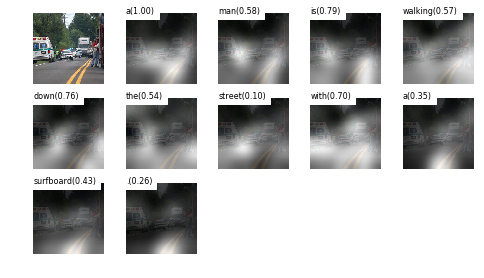

Sampled Caption: a baseball player pitching a ball on top of a field .


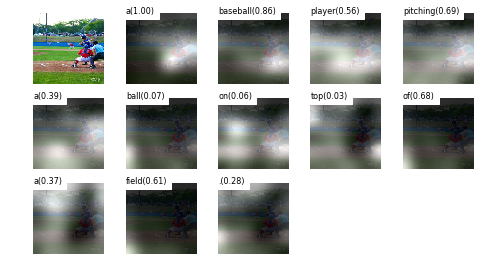

Sampled Caption: a city street at night with a clock tower in the background .


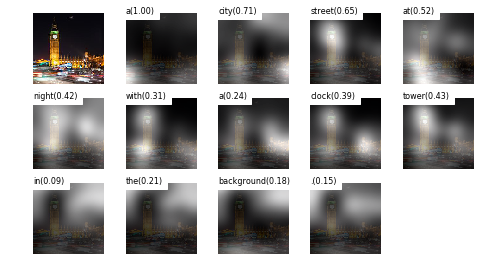

Sampled Caption: a man is swinging a tennis racket at a ball .


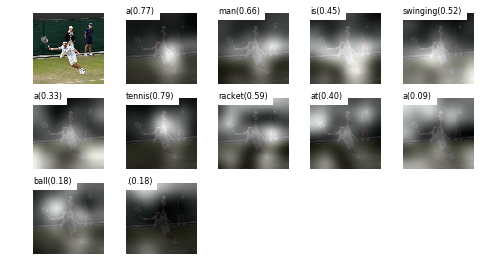

Sampled Caption: a baseball player pitching a ball on top of a field .


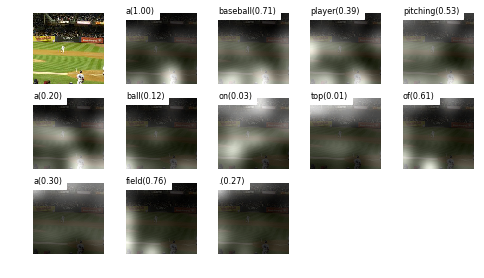

Sampled Caption: a person is holding a pair of scissors sitting on a table .


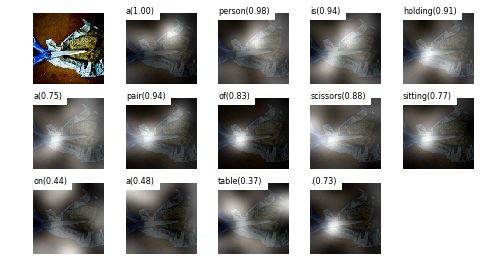

Sampled Caption: a man is standing in front of a bus .


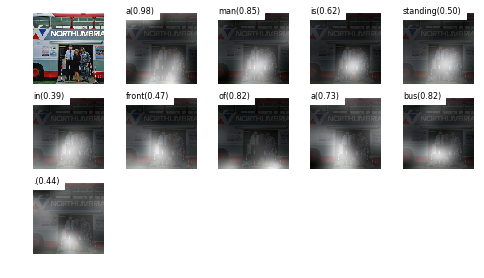

Sampled Caption: a large white bus driving down a street .


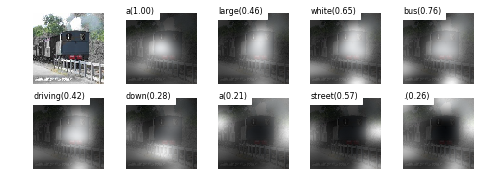

Sampled Caption: a red truck with a large open trailer on the roof .


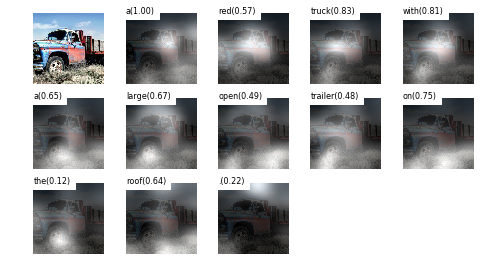

Sampled Caption: a close up of a bowl of carrots and vegetables .


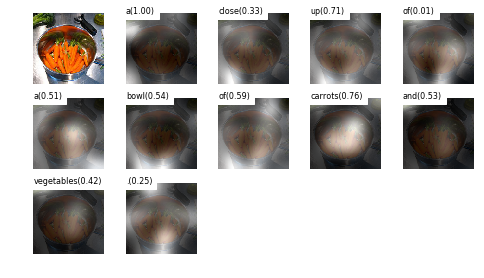

Saved ./data/val/val.candidate.captions.pkl..


In [19]:
solver.test(data, split='val')

In [20]:
test = load_coco_data(data_path='./data', split='test')

('image_idxs', <type 'numpy.ndarray'>, (19589,), dtype('int32'))
('file_names', <type 'numpy.ndarray'>, (4048,), dtype('<U51'))
('features', <type 'numpy.ndarray'>, (4048, 196, 512), dtype('<f4'))
('captions', <type 'numpy.ndarray'>, (19589, 17), dtype('int32'))
Elapse time: 2.30


INFO:tensorflow:Restoring parameters from ./model/lstm/model-20
Sampled Caption: a brown and white cow standing next to a brown horse .


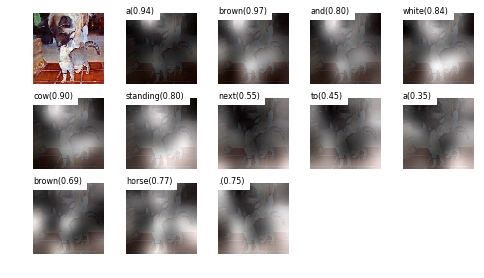

Sampled Caption: a group of people standing in a field with a kite .


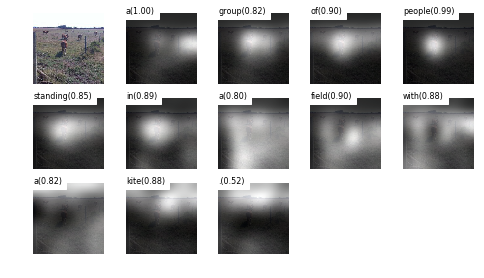

Sampled Caption: a bus driving down a street in front of a tall building .


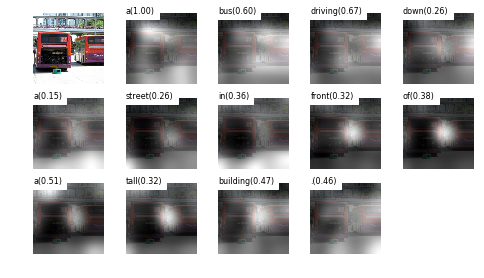

Sampled Caption: a man in a suit and tie standing in front of a tv .


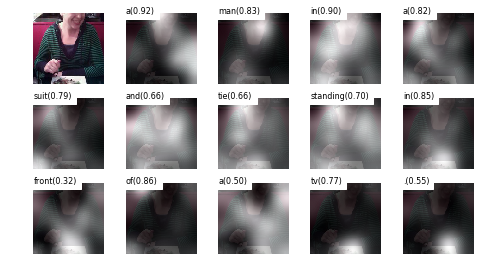

Sampled Caption: two sheep standing in a grassy field next to a tree .


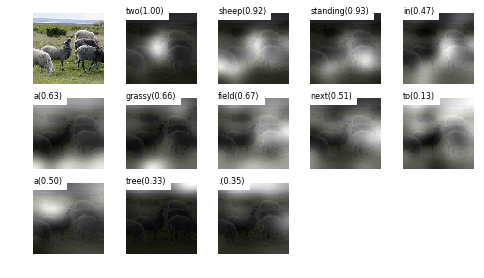

Sampled Caption: a person holding a blue umbrella standing near a bus .


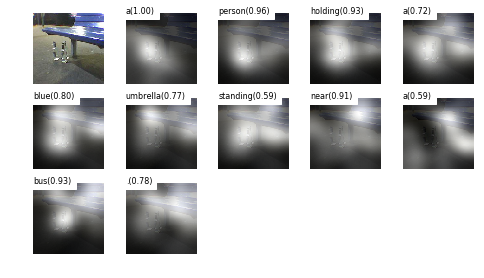

Sampled Caption: a white bathroom with a white toilet and sink .


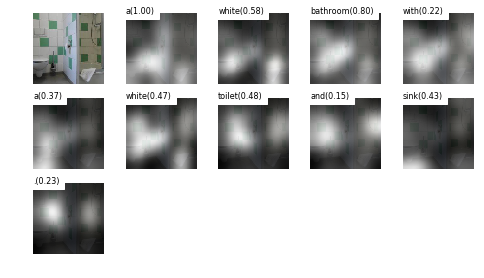

Sampled Caption: a laptop and a laptop on a desk in a room .


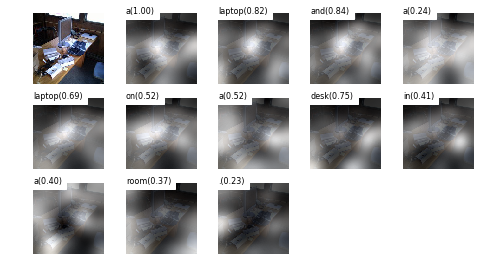

Sampled Caption: a white sink and toilet in a small room .


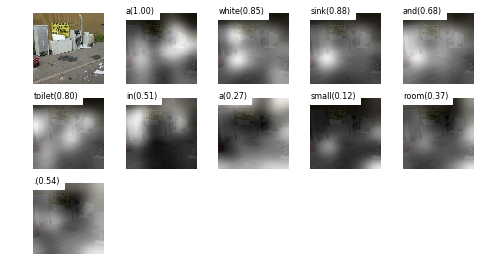

Sampled Caption: a man swinging a baseball bat on a field .


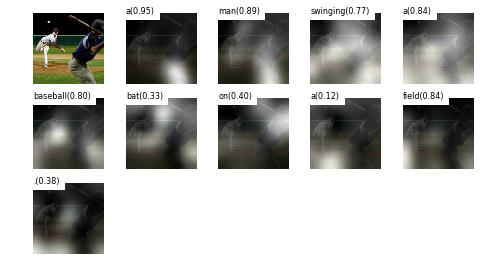

Saved ./data/test/test.candidate.captions.pkl..


In [21]:
tf.get_variable_scope().reuse_variables()
solver.test(test, split='test')

In [22]:
evaluate(data_path='./data', split='val')

{'reflen': 44098, 'guess': [44808, 40756, 36704, 32652], 'testlen': 44808, 'correct': [27728, 10474, 4094, 1737]}
ratio: 1.01610050342
('Bleu_1:\t', 0.618818068202093)
('Bleu_2:\t', 0.3987879260341853)
('Bleu_3:\t', 0.2607991357877727)
('Bleu_4:\t', 0.17526779324896125)
('METEOR:\t', 0.19965884248738064)
('ROUGE_L:', 0.48889072172141473)
('CIDEr:\t', 0.5570601851768969)


In [23]:
evaluate(data_path='./data', split='test')

{'reflen': 44067, 'guess': [44961, 40913, 36865, 32817], 'testlen': 44961, 'correct': [27789, 10536, 4197, 1781]}
ratio: 1.02028728981
('Bleu_1:\t', 0.6180689931273634)
('Bleu_2:\t', 0.3989566388922746)
('Bleu_3:\t', 0.2626588516949052)
('Bleu_4:\t', 0.17708643356509843)
('METEOR:\t', 0.19955875921912689)
('ROUGE_L:', 0.48789876022059653)
('CIDEr:\t', 0.5470611087429245)
